In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
train = pd.read_csv('train.csv')
train[:5]

,ID,dri_score,psych_disturb,cyto_score,diabetes,hla_match_c_high,hla_high_res_8,tbi_status,arrhythmia,hla_low_res_6,...,tce_div_match,donor_related,melphalan_dose,hla_low_res_8,cardiac,hla_match_drb1_high,pulm_moderate,hla_low_res_10,efs,efs_time
0,0,N/A - non-malignant indication,No,NaN,No,NaN,NaN,No TBI,No,6.0,...,NaN,Unrelated,"N/A, Mel not given",8.0,No,2.0,No,10.0,0.0,42.356
1,1,Intermediate,No,Intermediate,No,2.0,8.0,"TBI +- Other, >cGy",No,6.0,...,Permissive mismatched,Related,"N/A, Mel not given",8.0,No,2.0,Yes,10.0,1.0,4.672
2,2,N/A - non-malignant indication,No,NaN,No,2.0,8.0,No TBI,No,6.0,...,Permissive mismatched,Related,"N/A, Mel not given",8.0,No,2.0,No,10.0,0.0,19.793
3,3,High,No,Intermediate,No,2.0,8.0,No TBI,No,6.0,...,Permissive mismatched,Unrelated,"N/A, Mel not given",8.0,No,2.0,No,10.0,0.0,102.349
4,4,High,No,NaN,No,2.0,8.0,No TBI,No,6.0,...,Permissive mismatched,Related,MEL,8.0,No,2.0,No,10.0,0.0,16.223


In [5]:
test = pd.read_csv('test.csv')

In [6]:
print(len(test.columns))
print(len(train.columns))

58
60


In [7]:
pd.read_csv('data_dictionary.csv')

,variable,description,type,values
0,dri_score,Refined disease risk index,Categorical,['Intermediate' 'High' 'N/A - non-malignant in...
1,psych_disturb,Psychiatric disturbance,Categorical,['Yes' 'No' nan 'Not done']
2,cyto_score,Cytogenetic score,Categorical,['Intermediate' 'Favorable' 'Poor' 'TBD' nan '...
3,diabetes,Diabetes,Categorical,['No' 'Yes' nan 'Not done']
4,hla_match_c_high,Recipient / 1st donor allele level (high resol...,Numerical,NaN
5,hla_high_res_8,Recipient / 1st donor allele-level (high resol...,Numerical,NaN
6,tbi_status,TBI,Categorical,"['No TBI' 'TBI + Cy +- Other' 'TBI +- Other, <..."
7,arrhythmia,Arrhythmia,Categorical,['No' nan 'Yes' 'Not done']
8,hla_low_res_6,Recipient / 1st donor antigen-level (low resol...,Numerical,NaN
9,graft_type,Graft type,Categorical,['Peripheral blood' 'Bone marrow']


In [8]:
train.shape

(28800, 60)

In [9]:
test

,ID,dri_score,psych_disturb,cyto_score,diabetes,hla_match_c_high,hla_high_res_8,tbi_status,arrhythmia,hla_low_res_6,...,karnofsky_score,hepatic_mild,tce_div_match,donor_related,melphalan_dose,hla_low_res_8,cardiac,hla_match_drb1_high,pulm_moderate,hla_low_res_10
0,28800,N/A - non-malignant indication,No,NaN,No,NaN,NaN,No TBI,No,6.0,...,90.0,No,NaN,Unrelated,"N/A, Mel not given",8.0,No,2.0,No,10.0
1,28801,Intermediate,No,Intermediate,No,2.0,8.0,"TBI +- Other, >cGy",No,6.0,...,90.0,No,Permissive mismatched,Related,"N/A, Mel not given",8.0,No,2.0,Yes,10.0
2,28802,N/A - non-malignant indication,No,NaN,No,2.0,8.0,No TBI,No,6.0,...,90.0,No,Permissive mismatched,Related,"N/A, Mel not given",8.0,No,2.0,No,10.0


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Seleccionar solo columnas numéricas
numeric_cols = train.select_dtypes(include=['number'])

# Si hay demasiadas columnas, selecciona las más relevantes (por ejemplo, las primeras 10)
top_cols = numeric_cols.iloc[:, :10] if numeric_cols.shape[1] > 10 else numeric_cols

In [14]:
from lifelines import  NelsonAalenFitter
def create_nelson(data):
    data=data.copy()
    naf = NelsonAalenFitter(nelson_aalen_smoothing=0)
    naf.fit(durations=data['efs_time'], event_observed=data['efs'])
    return naf.cumulative_hazard_at_times(data['efs_time']).values*-1

In [15]:
RMV = ["ID","efs","efs_time","y","efs_time2"]
FEATURES = [c for c in train.columns if not c in RMV]
print(f"There are {len(FEATURES)} FEATURES: {FEATURES}")

There are 57 FEATURES: ['dri_score', 'psych_disturb', 'cyto_score', 'diabetes', 'hla_match_c_high', 'hla_high_res_8', 'tbi_status', 'arrhythmia', 'hla_low_res_6', 'graft_type', 'vent_hist', 'renal_issue', 'pulm_severe', 'prim_disease_hct', 'hla_high_res_6', 'cmv_status', 'hla_high_res_10', 'hla_match_dqb1_high', 'tce_imm_match', 'hla_nmdp_6', 'hla_match_c_low', 'rituximab', 'hla_match_drb1_low', 'hla_match_dqb1_low', 'prod_type', 'cyto_score_detail', 'conditioning_intensity', 'ethnicity', 'year_hct', 'obesity', 'mrd_hct', 'in_vivo_tcd', 'tce_match', 'hla_match_a_high', 'hepatic_severe', 'donor_age', 'prior_tumor', 'hla_match_b_low', 'peptic_ulcer', 'age_at_hct', 'hla_match_a_low', 'gvhd_proph', 'rheum_issue', 'sex_match', 'hla_match_b_high', 'race_group', 'comorbidity_score', 'karnofsky_score', 'hepatic_mild', 'tce_div_match', 'donor_related', 'melphalan_dose', 'hla_low_res_8', 'cardiac', 'hla_match_drb1_high', 'pulm_moderate', 'hla_low_res_10']


In [16]:
CATS = []
for c in FEATURES:
    if train[c].dtype=="object":
        CATS.append(c)
        train[c] = train[c].fillna("NAN")
        test[c] = test[c].fillna("NAN")
print(f"In these features, there are {len(CATS)} CATEGORICAL FEATURES: {CATS}")

In these features, there are 35 CATEGORICAL FEATURES: ['dri_score', 'psych_disturb', 'cyto_score', 'diabetes', 'tbi_status', 'arrhythmia', 'graft_type', 'vent_hist', 'renal_issue', 'pulm_severe', 'prim_disease_hct', 'cmv_status', 'tce_imm_match', 'rituximab', 'prod_type', 'cyto_score_detail', 'conditioning_intensity', 'ethnicity', 'obesity', 'mrd_hct', 'in_vivo_tcd', 'tce_match', 'hepatic_severe', 'prior_tumor', 'peptic_ulcer', 'gvhd_proph', 'rheum_issue', 'sex_match', 'race_group', 'hepatic_mild', 'tce_div_match', 'donor_related', 'melphalan_dose', 'cardiac', 'pulm_moderate']


In [17]:
combined = pd.concat([train,test],axis=0,ignore_index=True)
print("We LABEL ENCODE the CATEGORICAL FEATURES: ",end="")
for c in FEATURES:
 
    if c in CATS:
        print(f"{c}, ",end="")
        combined[c],_ = combined[c].factorize()
        combined[c] -= combined[c].min()
        combined[c] = combined[c].astype("int32")
        combined[c] = combined[c].astype("category")
 
    else:
        if combined[c].dtype=="float64":
            combined[c] = combined[c].astype("float32")
        if combined[c].dtype=="int64":
            combined[c] = combined[c].astype("int32")
 
train = combined.iloc[:len(train)].copy()
test = combined.iloc[len(train):].reset_index(drop=True).copy()

We LABEL ENCODE the CATEGORICAL FEATURES: dri_score, psych_disturb, cyto_score, diabetes, tbi_status, arrhythmia, graft_type, vent_hist, renal_issue, pulm_severe, prim_disease_hct, cmv_status, tce_imm_match, rituximab, prod_type, cyto_score_detail, conditioning_intensity, ethnicity, obesity, mrd_hct, in_vivo_tcd, tce_match, hepatic_severe, prior_tumor, peptic_ulcer, gvhd_proph, rheum_issue, sex_match, race_group, hepatic_mild, tce_div_match, donor_related, melphalan_dose, cardiac, pulm_moderate, 

In [18]:
train["y_nel"] = create_nelson(train)
 
print(train[["efs", "efs_time", "y_nel"]].head())
print(train.y_nel.min())

   efs  efs_time     y_nel
0  0.0    42.356 -0.779331
1  1.0     4.672 -0.165150
2  0.0    19.793 -0.771216
3  0.0   102.349 -0.783756
4  0.0    16.223 -0.766364
-0.7923866866657324


In [19]:
combined.iloc[:len(train)].copy().dropna()

,ID,dri_score,psych_disturb,cyto_score,diabetes,hla_match_c_high,hla_high_res_8,tbi_status,arrhythmia,hla_low_res_6,...,tce_div_match,donor_related,melphalan_dose,hla_low_res_8,cardiac,hla_match_drb1_high,pulm_moderate,hla_low_res_10,efs,efs_time
1,1,1,0,1,0,2.0,8.0,1,0,6.0,...,1,1,0,8.0,0,2.0,1,10.0,1.0,4.672
3,3,2,0,1,0,2.0,8.0,0,0,6.0,...,1,0,0,8.0,0,2.0,0,10.0,0.0,102.349
4,4,2,0,0,0,2.0,8.0,0,0,6.0,...,1,1,1,8.0,0,2.0,0,10.0,0.0,16.223
5,5,2,0,2,1,2.0,7.0,2,0,4.0,...,1,1,0,5.0,0,2.0,1,6.0,1.0,7.095
6,6,3,0,2,0,2.0,8.0,0,0,6.0,...,1,0,0,8.0,0,2.0,1,10.0,0.0,46.464
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28794,28794,5,0,0,0,2.0,8.0,0,0,6.0,...,1,0,0,8.0,0,2.0,0,10.0,1.0,6.279
28796,28796,2,0,2,1,1.0,4.0,0,0,5.0,...,2,1,0,6.0,1,1.0,1,8.0,1.0,4.892
28797,28797,6,3,2,3,2.0,8.0,0,2,6.0,...,2,0,0,8.0,3,2.0,0,10.0,0.0,23.157
28798,28798,0,0,2,0,1.0,4.0,0,0,3.0,...,1,1,1,4.0,0,1.0,0,5.0,0.0,52.351


In [20]:
train_temp = combined.iloc[:len(train)].copy().dropna()
test_temp = combined.iloc[len(train_temp):].reset_index(drop=True).copy()
train_temp["y_nel"] = create_nelson(train_temp)

In [21]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, f_classif
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming train is your DataFrame and you've already imported pandas
# Replace 'target_column' with the name of your target column
X_temp = train_temp.drop(columns=['y_nel'])
y_temp = train_temp['y_nel']

In [29]:
X_temp.columns

Index(['ID', 'dri_score', 'psych_disturb', 'cyto_score', 'diabetes',
       'hla_match_c_high', 'hla_high_res_8', 'tbi_status', 'arrhythmia',
       'hla_low_res_6', 'graft_type', 'vent_hist', 'renal_issue',
       'pulm_severe', 'prim_disease_hct', 'hla_high_res_6', 'cmv_status',
       'hla_high_res_10', 'hla_match_dqb1_high', 'tce_imm_match', 'hla_nmdp_6',
       'hla_match_c_low', 'rituximab', 'hla_match_drb1_low',
       'hla_match_dqb1_low', 'prod_type', 'cyto_score_detail',
       'conditioning_intensity', 'ethnicity', 'year_hct', 'obesity', 'mrd_hct',
       'in_vivo_tcd', 'tce_match', 'hla_match_a_high', 'hepatic_severe',
       'donor_age', 'prior_tumor', 'hla_match_b_low', 'peptic_ulcer',
       'age_at_hct', 'hla_match_a_low', 'gvhd_proph', 'rheum_issue',
       'sex_match', 'hla_match_b_high', 'race_group', 'comorbidity_score',
       'karnofsky_score', 'hepatic_mild', 'tce_div_match', 'donor_related',
       'melphalan_dose', 'hla_low_res_8', 'cardiac', 'hla_match_drb1_hi

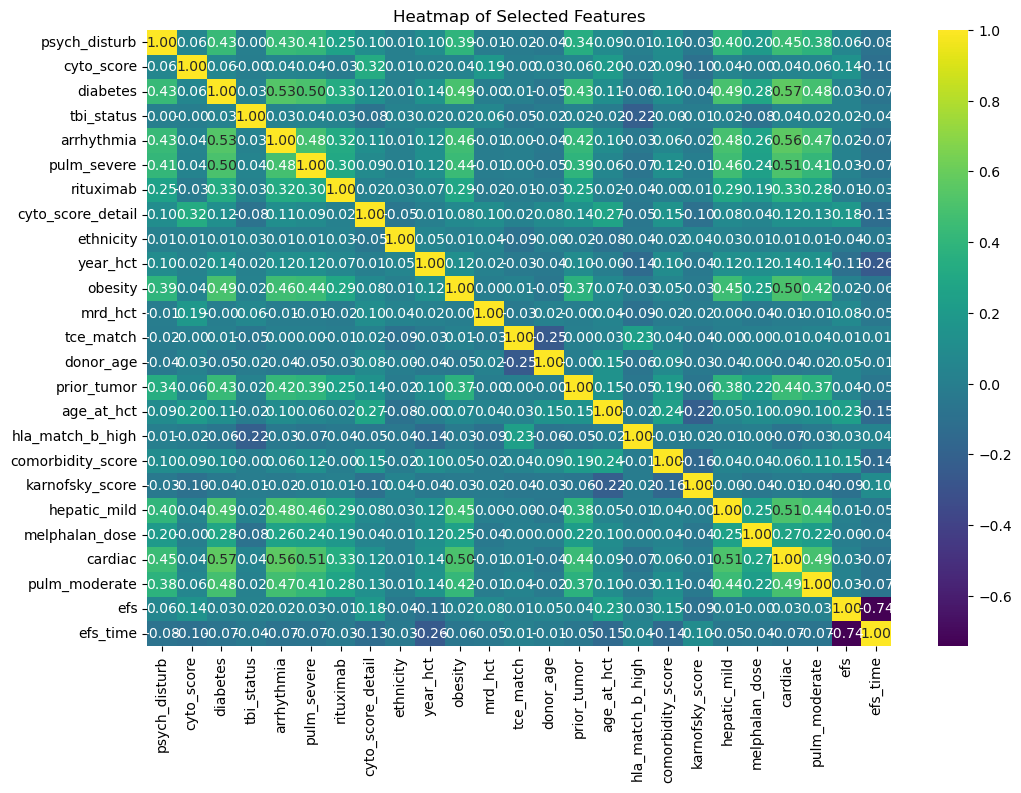

In [30]:
# Select the top 10 most relevant features
selector = SelectKBest(score_func=f_classif, k=25)
X_new = selector.fit_transform(X_temp, y_temp)

# Get the selected feature names
selected_features = X_temp.columns[selector.get_support()]

# Create a new DataFrame with only the selected features
df_selected = train[selected_features]

# Calculate the correlation matrix
corr_matrix = df_selected.corr()

# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='viridis', fmt='.2f')
plt.title('Heatmap of Selected Features')
plt.show()

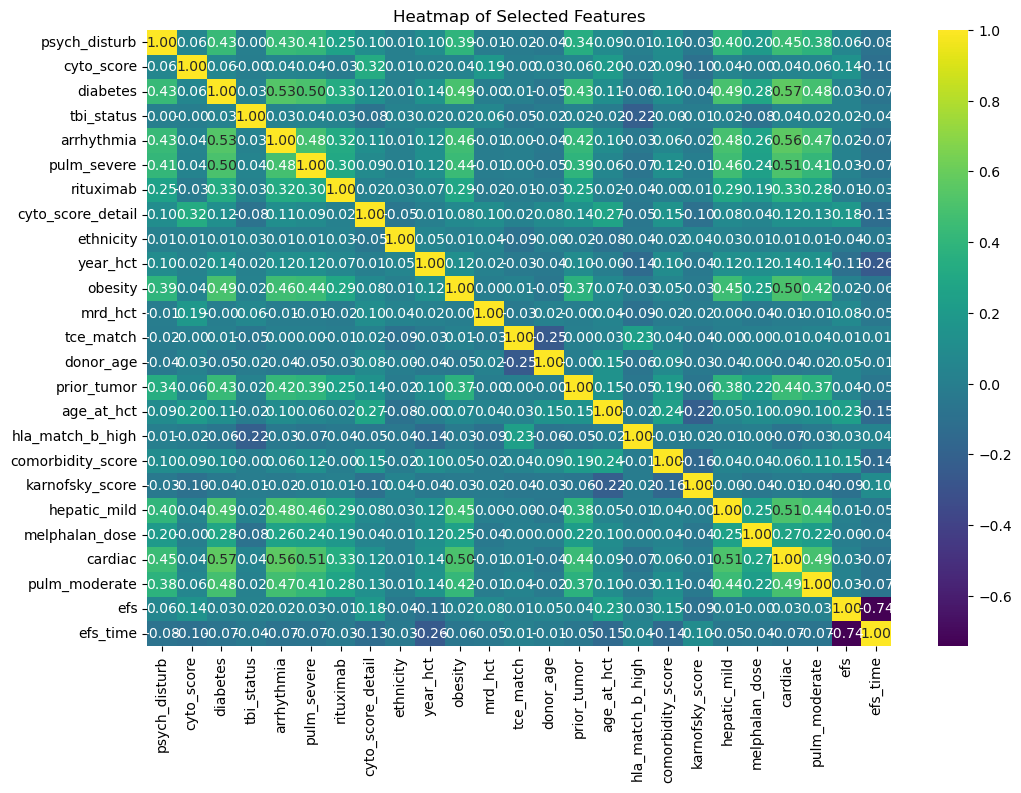

In [31]:
# Select the top 10 most relevant features
selector = SelectKBest(score_func=f_classif, k=25)
X_new = selector.fit_transform(X_temp, y_temp)

# Get the selected feature names
selected_features = X_temp.columns[selector.get_support()]

# Create a new DataFrame with only the selected features
df_selected = train[selected_features]

# Calculate the correlation matrix
corr_matrix = df_selected.corr()

# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='viridis', fmt='.2f')
plt.title('Heatmap of Selected Features')
plt.show()

In [ ]:
generar error

In [81]:
selected_features

Index(['psych_disturb', 'diabetes', 'tbi_status', 'arrhythmia', 'pulm_severe',
       'rituximab', 'cyto_score_detail', 'year_hct', 'obesity', 'mrd_hct',
       'donor_age', 'prior_tumor', 'age_at_hct', 'comorbidity_score',
       'karnofsky_score', 'hepatic_mild', 'melphalan_dose', 'pulm_moderate',
       'efs', 'efs_time'],
      dtype='object')

In [83]:
selected_features

Index(['psych_disturb', 'arrhythmia', 'pulm_severe', 'cyto_score_detail',
       'year_hct', 'mrd_hct', 'comorbidity_score', 'karnofsky_score', 'efs',
       'efs_time'],
      dtype='object')

In [ ]:
top_cols

,ID,hla_match_c_high,hla_high_res_8,hla_low_res_6,hla_high_res_6,hla_high_res_10,hla_match_dqb1_high,hla_nmdp_6,hla_match_c_low,hla_match_drb1_low
0,0,NaN,NaN,6.0,6.0,NaN,2.0,6.0,2.0,2.0
1,1,2.0,8.0,6.0,6.0,10.0,2.0,6.0,2.0,2.0
2,2,2.0,8.0,6.0,6.0,10.0,2.0,6.0,2.0,2.0
3,3,2.0,8.0,6.0,6.0,10.0,2.0,6.0,2.0,2.0
4,4,2.0,8.0,6.0,6.0,10.0,2.0,5.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...
28795,28795,2.0,8.0,6.0,6.0,10.0,2.0,6.0,2.0,2.0
28796,28796,1.0,4.0,5.0,3.0,6.0,2.0,4.0,1.0,2.0
28797,28797,2.0,8.0,6.0,6.0,10.0,2.0,6.0,2.0,2.0
28798,28798,1.0,4.0,3.0,3.0,5.0,1.0,3.0,1.0,1.0


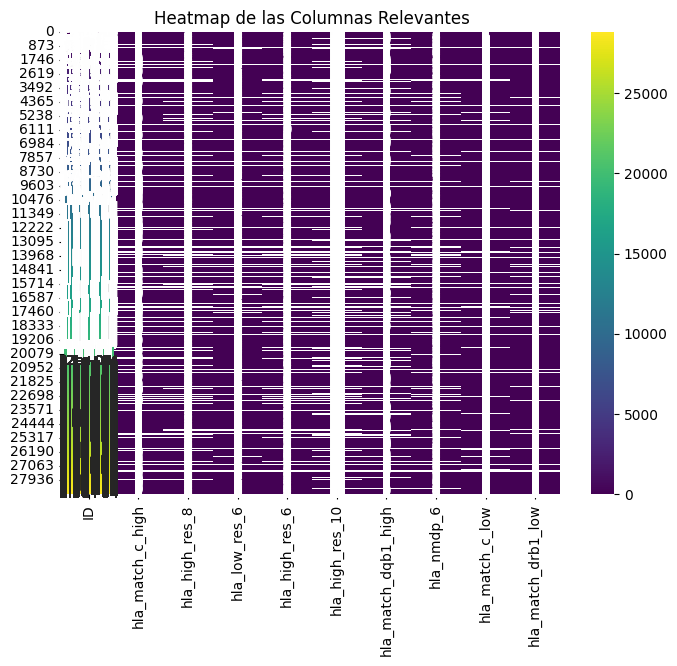

In [ ]:
# Graficar el heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(top_cols, annot=True, cmap='viridis')
plt.title('Heatmap de las Columnas Relevantes')
plt.show()